In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
from scipy.spatial.distance import euclidean
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import precision_score, recall_score

In [2]:
# Creating custom KNN classifier
class kNN:
    def fit(self, x_train, y_train):
        self.x_train = np.array(x_train)
        self.y_train = np.array(y_train)
    def predict(self, x_test):
        x_test = np.array(x_test)
        predictions = np.empty(len(x_test), dtype=y_train[0].dtype)
        for t, test in enumerate(x_test):
            ind = 0 
            dis = euclidean(x_test[0] , self.x_train[0])
            for i, train in enumerate(self.x_train):
                tt_dis = euclidean(test,train)
                if tt_dis < dis:
                    dis = tt_dis
                    ind = i
            predictions[t] = self.y_train[ind]
        return predictions

In [3]:
#1 Loading dataset & labeling the features
df = pd.read_csv('data_banknote_authentication.txt', 
    names=['variance', 'skewness', 'curtosis', 'entropy', 'class'])

In [4]:
#2 Processing data for Spliting & Training
X = df[['variance', 'skewness', 'curtosis', 'entropy']]
Y = df['class']

In [5]:
#2 Spliting the data into train, test parts
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

In [6]:
#3 Scaling data in range(0-1) for better performance/prediction
X_train =pd.DataFrame(MinMaxScaler().fit_transform(X_train),columns=X_train.columns)
X_test =pd.DataFrame(MinMaxScaler().fit_transform(X_test),columns=X_test.columns)

In [7]:
#4 importing k-nearest neighbors classifier(Sklearn)
KNN = KNeighborsClassifier()

In [8]:
#4 training the classifier
KNN.fit(X_train, y_train)
# Predictions of the classifier
predictions = KNN.predict(X_test)
print(predictions)

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1]


In [9]:
#5 precision accuracy of Sklearn KNN
precision_score(y_test, predictions)

0.9921875

In [10]:
# recall_score of KNN
recall_score(y_test, predictions)

1.0

In [11]:
#4 importing k-nearest neighbors classifier(Custom)
kNN = kNN()

In [12]:
#4 training the classifier
kNN.fit(X_train, y_train)
# Predictions of the classifier
predictions = kNN.predict(X_test)
print(predictions)

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 1 0 1 0 0 0 0 1 0
 1 0 1 0 0 0 0 1 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0
 1 1 1 1 1 0 0 0 1 0 0 0 1 1 1 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1
 0 0 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 1 1
 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 1 1 1
 0 0 0 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0
 1 1 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1
 1 1 1 0 0 1 1 0 1 0 0 0 0 0 0 1]


In [13]:
#5 precision accuracy of custom KNN
precision_score(y_test, predictions)

0.9921875

Text(0, 0.5, 'Class')

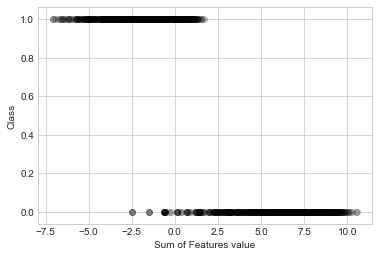

In [14]:
#6 Data visualizing using matplotlib
x = df['variance']+df['skewness']+df['curtosis']+df['entropy']
y = df['class']
plt.scatter(x, y, color='black', alpha=0.2)
plt.xlabel("Sum of Features value")
plt.ylabel("Class")

Text(0.5, 1.0, 'Counterfeit pie chart')

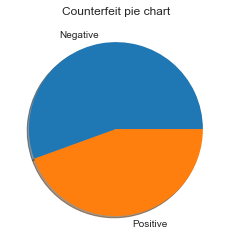

In [15]:
figpie, axpie = plt.subplots()
labels = 'Negative', 'Positive'
sizes = df['class'].value_counts().tolist()
axpie.pie(sizes, labels=labels, shadow=True)
axpie.set_title("Counterfeit pie chart")